In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
# consejos: utiliza robustscaler para escalar las variables, 
# Random Forest Regression y kneighbors son los que mejor resultados dan
# pero lo que da puntuaciones más altas es usar H2O es un poco más coñazo configurarlo pero es el que más accuracy da.

In [2]:
diamantes = pd.read_csv('./input/diamonds_train.csv')
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,Premium,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,Ideal,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,Ideal,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,Ideal,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,Ideal,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [3]:
diamantes.shape

(40345, 11)

In [4]:
diamantes.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
diamantes.describe()

,id,carat,depth,table,x,y,z,price
count,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000,40345.000000
mean,20172.000000,0.797699,61.749721,57.449421,5.730824,5.734808,3.537958,3931.902243
std,11646.742642,0.474309,1.427728,2.234087,1.121767,1.151536,0.695039,3994.318832
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,10086.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,952.000000
50%,20172.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,30258.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.030000,5317.000000
max,40344.000000,5.010000,79.000000,95.000000,10.740000,58.900000,8.060000,18823.000000


In [6]:
correlacionDiamantes = diamantes.corr()

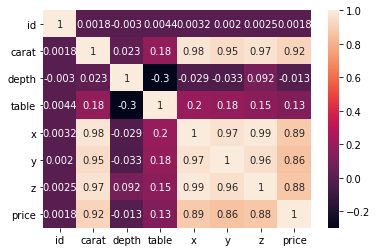

In [7]:
import seaborn as sns
ax_corr = sns.heatmap(correlacionDiamantes, annot = True)

In [8]:
print(diamantes.dtypes)

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [9]:
diamantes.describe(include=object)

,cut,color,clarity
count,40345,40345,40345
unique,5,7,8
top,Ideal,G,SI1
freq,16141,8462,9710


In [10]:
diamantes.cut.value_counts()

Ideal        16141
Premium      10303
Very Good     9068
Good          3631
Fair          1202
Name: cut, dtype: int64

In [11]:
def num_cut(row):
    groups = {
        "Ideal" : 1,
        "Premium" : 2,
        "Very Good" : 3,
        "Good" : 4,
        "Fair" : 5
    }
    return groups[row]

In [12]:
diamantes['cut'] = diamantes['cut'].apply(lambda x: num_cut(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,2,F,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,1,D,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,1,F,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,1,E,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,1,J,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [13]:
diamantes.color.value_counts()

G    8462
E    7292
F    7133
H    6200
D    5094
I    4094
J    2070
Name: color, dtype: int64

In [14]:
def num_color(row):
    groups = {
        "D" : 1,
        "E" : 2,
        "F" : 3,
        "G" : 4,
        "H" : 5,
        "I" : 6,
        "J" : 7
    }
    return groups[row]

In [15]:
diamantes['color'] = diamantes['color'].apply(lambda x: num_color(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,2,3,VS1,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,1,1,SI1,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,1,3,SI1,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,1,2,VVS2,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,1,7,SI1,61.4,55.0,5.58,5.62,3.44,1276


In [16]:
diamantes.clarity.value_counts()

SI1     9710
VS2     9164
SI2     6884
VS1     6092
VVS2    3839
VVS1    2738
IF      1357
I1       561
Name: clarity, dtype: int64

In [17]:
def num_clarity(row):
    groups = {
        "IF" : 1,
        "VVS1" : 2,
        "VVS2" : 3,
        "VS1" : 4,
        "VS2" : 5,
        "SI1" : 6,
        "SI2" : 7,
        "I1" : 8
    }
    return groups[row]

In [18]:
diamantes['clarity'] = diamantes['clarity'].apply(lambda x: num_clarity(x))
diamantes.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,2,3,4,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,1,1,6,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,1,3,6,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,1,2,3,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,1,7,6,61.4,55.0,5.58,5.62,3.44,1276


In [19]:
print(diamantes.dtypes)

id           int64
carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [20]:
newCorr = diamantes.corr()

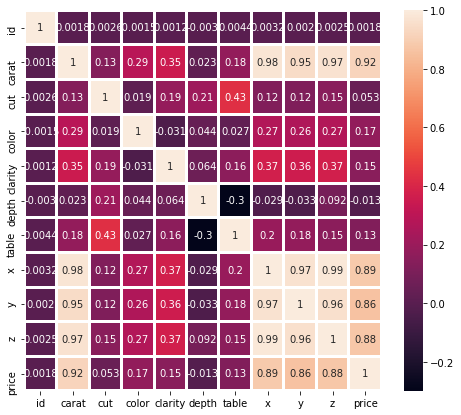

In [21]:
import matplotlib.pyplot as plt
fig, ax_newCorr = plt.subplots(figsize=(8,7))  
ax_newCorr = sns.heatmap(newCorr, annot = True, linewidths=2)

In [22]:
X = diamantes[["carat", "cut", "color", "clarity"]]#, "depth", "table"]]#, "x", "y", "z"]]
y = diamantes["price"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#import math
#ts_rows = diamantes.shape[0]
#ts_rows = (ts_rows*80)/100
#ts_rows = math.ceil(ts_rows)
#ts_rows

In [25]:
#X_ts_train = X[:ts_rows]
#X_ts_test = X[ts_rows:]
#X.shape

In [26]:
#y_ts_train = y[:ts_rows]
#y_ts_test = y[ts_rows:]
#y.shape

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import sklearn
diamantes_Regression = linear_model.LinearRegression()
diamantes_Regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Luego de entrenar el modelo paso ahora a limpiar el dataset del test. Que es lo que haré a continuación:

In [29]:
######################### T E S T ###########################

In [30]:
diamantesTest = pd.read_csv('./input/diamonds_test.csv')
diamantesTest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,Premium,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,Ideal,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,Premium,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,Premium,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,Ideal,F,SI1,61.8,55.0,5.27,5.22,3.24


In [31]:
#diamantesTest.shape

In [32]:
#diamantesTest.isna().sum()

In [33]:
#diamantesTest.describe()

In [34]:
correlacionDiamantesTest = diamantesTest.corr()

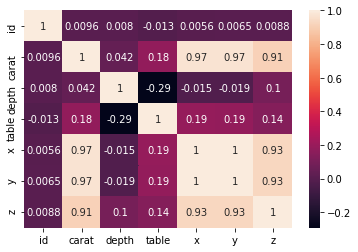

In [35]:
ax_corrTest = sns.heatmap(correlacionDiamantesTest, annot = True)

In [36]:
#print(diamantesTest.dtypes)

In [37]:
#diamantesTest.describe(include=object)

In [38]:
#diamantesTest.cut.value_counts()

In [39]:
def num_cut(row):
    groups = {
        "Ideal" : 1,
        "Premium" : 2,
        "Very Good" : 3,
        "Good" : 4,
        "Fair" : 5
    }
    return groups[row]

In [40]:
diamantesTest['cut'] = diamantesTest['cut'].apply(lambda x: num_cut(x))
diamantesTest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,H,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,I,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,G,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,F,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,F,SI1,61.8,55.0,5.27,5.22,3.24


In [41]:
#diamantesTest.color.value_counts()

In [42]:
def num_color(row):
    groups = {
        "D" : 1,
        "E" : 2,
        "F" : 3,
        "G" : 4,
        "H" : 5,
        "I" : 6,
        "J" : 7
    }
    return groups[row]

In [43]:
diamantesTest['color'] = diamantesTest['color'].apply(lambda x: num_color(x))
diamantesTest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,5,SI2,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,6,SI1,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,4,SI1,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,3,SI1,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,3,SI1,61.8,55.0,5.27,5.22,3.24


In [44]:
#diamantesTest.clarity.value_counts()

In [45]:
def num_clarity(row):
    groups = {
        "IF" : 1,
        "VVS1" : 2,
        "VVS2" : 3,
        "VS1" : 4,
        "VS2" : 5,
        "SI1" : 6,
        "SI2" : 7,
        "I1" : 8
    }
    return groups[row]

In [46]:
diamantesTest['clarity'] = diamantesTest['clarity'].apply(lambda x: num_clarity(x))
diamantesTest.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,2,5,7,62.2,58.0,6.69,6.60,4.13
1,1,0.51,1,6,6,62.5,57.0,5.07,5.10,3.18
2,2,2.03,2,4,6,61.9,59.0,8.14,8.09,5.02
3,3,1.21,2,3,6,60.0,60.0,6.96,6.91,4.16
4,4,0.55,1,3,6,61.8,55.0,5.27,5.22,3.24


In [47]:
#print(diamantesTest.dtypes)

In [48]:
newCorrTest = diamantesTest.corr()

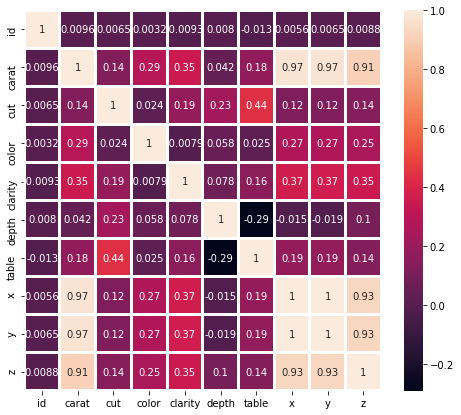

In [49]:
import matplotlib.pyplot as plt
fig, ax_newCorrTest = plt.subplots(figsize=(8,7))  
ax_newCorrTest = sns.heatmap(newCorrTest, annot = True, linewidths=2)

In [50]:
diamantesTestX = diamantesTest[["carat", "cut", "color", "clarity"]]#, "depth", "table"]]#, "x", "y", "z"]]

In [51]:
from sklearn.metrics import r2_score
pricePredict = diamantes_Regression.predict(diamantesTestX)
pricePredict

array([ 5067.771612  ,   251.40622204, 14064.34959504, ...,
         869.47197049,   541.99034461,  3168.90253599])

In [52]:
print('RMSE', np.sqrt(mean_squared_error(y_test, diamantes_Regression.predict(X_test))))
print('R2', r2_score(y_test, diamantes_Regression.predict(X_test)))

RMSE 1191.410937840814
R2 0.9124298778713796


In [53]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
diamantes_RandomForest = RandomForestRegressor(n_estimators=300, max_depth=50)
diamantes_RandomForest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [54]:
pricePredictRF = diamantes_RandomForest.predict(diamantesTestX)
pricePredictRF

array([ 4375.28050349,  1022.54728066, 15755.48375397, ...,
         512.54634642,   778.90062617,  2009.88438492])

In [55]:
print('RMSE', np.sqrt(mean_squared_error(y_test, diamantes_RandomForest.predict(X_test))))
print('R2', r2_score(y_test, diamantes_RandomForest.predict(X_test)))

RMSE 604.050865309919
R2 0.9774897762814085


In [56]:
from sklearn.neighbors import KNeighborsClassifier
diamantes_KNeigh = KNeighborsClassifier(n_neighbors=3)
diamantes_KNeigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
pricePredictKN = diamantes_KNeigh.predict(diamantesTestX)
pricePredictKN

array([ 4004,   984, 13767, ...,   530,   710,  1987])

In [58]:
print('RMSE', np.sqrt(mean_squared_error(y_test, diamantes_KNeigh.predict(X_test))))
print('R2', r2_score(y_test, diamantes_KNeigh.predict(X_test)))

RMSE 1032.6168940583234
R2 0.9342173686285985


In [59]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(diamantes_RandomForest, cv=10)
#print(f"({name}) acccuracy={np.mean(scores)}")

In [59]:
#diamantesTestX['price'] = pricePredictRF

In [60]:
#pPredictRF = diamantesTestX[['price']]

In [61]:
#pPredictRF.index.name = 'id'

In [62]:
#pPredictRF.to_csv('first_Price7.csv')

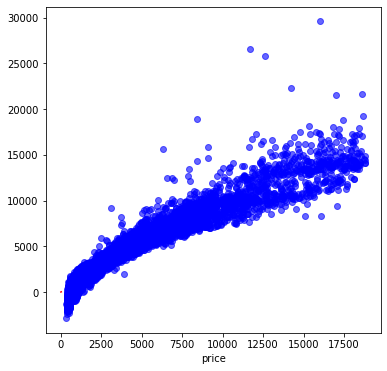

In [63]:
plt.figure(figsize=(6,6))
sns.regplot(y_test, diamantes_Regression.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

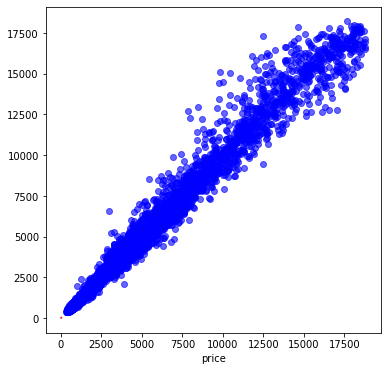

In [64]:
plt.figure(figsize=(6,6))
sns.regplot(y_test, diamantes_RandomForest.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

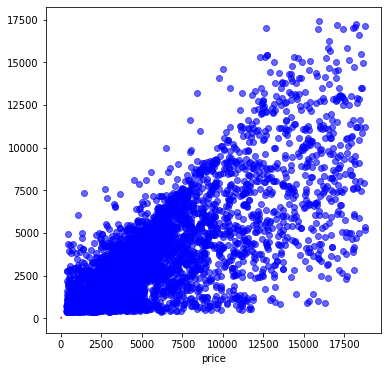

In [72]:
plt.figure(figsize=(6,6))
sns.regplot(y_test, diamantes_KNeigh.predict(X_test), color='blue', scatter_kws={'alpha':0.6}, fit_reg=False)
sns.lineplot([12, 33], [12, 33], color='red')

In [65]:
#    from sklearn.ensemble import RandomForestClassifier
#    diamantes_RandomForest = RandomForestClassifier(n_estimators=10)
#    diamantes_RandomForest.fit(X_train, y_train)

In [66]:
#from sklearn.metrics import r2_score
#y_pred = diamantes.predict(X_train)
#r2_score(y_train,y_pred)

In [67]:
#y_test_pred = diamantes.predict(X_test)
#r2_score(y_test, y_test_pred)

In [68]:
#from sklearn import svm
#clf = svm.SVC()
#clf.fit(X_train, y_train)
#clf.score(X_test,y_test)

In [69]:
#clf = svm.SVC()
#clf.fit(X_ts_train, y_ts_train)
#clf.score(X_ts_test,y_ts_test)

In [70]:
#diamantes = linear_model.LinearRegression()

In [71]:
#diamantes.fit(X_ts_train, y_ts_train)
#print(diamantes.intercept_, diamantes.coef_)